#### Q1: What is the shape (number of rows and columns) of the data set?

In [2]:
# Import the math tools, chart plotting, data management, regex, and preprocessing libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.preprocessing import Imputer

# Import the temperature data set
temp_data_path = "C:/TemperatureData/take_home_temperatures.csv"
temp_data = pd.read_csv(temp_data_path)

# Determine the shape (rows, columns) of the data set
shape_temp_data = np.array(temp_data)
print "(# of Rows, # of Columns):", shape_temp_data.shape

# Return the first 5 rows of the Pandas temperature data frame
temp_data.head()

(# of Rows, # of Columns): (783151L, 5L)


,Unnamed: 0,index,device_id,latlng,temperature
0,0,2017-05-01 00:10:00-07:00,551,39.4709200#-122.1316208,20.1
1,1,2017-05-01 00:20:00-07:00,551,39.4709200#-122.1316208,20.1
2,2,2017-05-01 00:30:00-07:00,551,39.4709200#-122.1316208,19.7
3,3,2017-05-01 00:40:00-07:00,551,39.4709200#-122.1316208,19.3
4,4,2017-05-01 00:50:00-07:00,551,39.4709200#-122.1316208,19.3


#### Q2: What is the average latitude and longitude of all the devices?

In [3]:
# Assumption:
#  Only interested in the cumulative average latitude and longitude across all of the devices 

# Select attribute containing combined latitude & longitude values
lat_long = temp_data.latlng.values

# Declare an empty latitude and longitude coordinates array
coords = []

# Declare coordinate information string for parsing Pandas dataframe
for coord_info in lat_long:
    # Parse string into separate latitude and longitude values
    lat, longit = coord_info.strip().split('#')
    # Append latitude and longitude values to coordinates array
    coords.append((float(lat),float(longit)))
    
# Eliminate duplicate coordinates and convert list to a Numpy array
coords = np.array(list(set(coords)))

# Calculate mean latitude and longitude coordinates, expressed to 6 decimal places
coords_mean = np.round(coords.mean(axis=0),6)

# Slice even- and odd-indexed elements into separate mean latitude and longitude arrays
latitude, longitude = coords_mean[::2], coords_mean[1::2]

# Print the average latitude and longitude coordinates
print "The average latitude is:", latitude
print "The average longitude is:", longitude

The average latitude is: [ 44.909989]
The average longitude is: [-121.965867]


#### Q3: What time of day is the hottest? What time of day is the coolest?

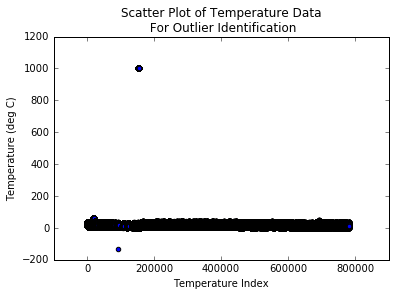

Unfiltered Temperature Output:
The outlier mean and standard deviation are 24.585726 and 71.132605, respectively.
The highest and lowest temperature oultiers are 1000.0 and -131.55483 deg C, respectively.

Filtered Temperature Output:
The filtered mean and standard deviation are 19.4676 and 8.205867, respectively.
The actual hottest and coolest temperatures are 60.0 and -0.9 deg C, respectively.

The time of day when the temperature is at its hottest:
60.0 deg C occurred at time index ['2017-05-01 00:10:00-07:00']
The time of day when the temperature is at its coolest:
-0.9 deg C occurred at time index ['2017-05-07 05:30:00-07:00']


In [4]:
# Assumptions:
#  Temperature data is expressed in degrees Celsius (deg C)
#  Reject temperatures that fall outside plus or minus 100 deg C

# Generate scatter plot of temperature data (y-axis), to visibly identify outliers
index_id = temp_data.iloc[:, :-4].values
temp = temp_data.iloc[:, 4:].values
plt.scatter(index_id, temp)
plt.title('Scatter Plot of Temperature Data\n For Outlier Identification')
plt.xlabel('Temperature Index')
plt.ylabel('Temperature (deg C)')
plt.show()

# Replace missing values with mean temperature
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(temp)
temp = imputer.transform(temp)

# Print the temperature outlier mean and standard deviation
print "Unfiltered Temperature Output:"
print "The outlier mean and standard deviation are %s and %s, respectively." % (round(np.mean(temp),6), 
                                                                                round(np.std(temp),6))

# Print the max and min temperature outliers
print "The highest and lowest temperature oultiers are %s and %s deg C, respectively." % (round(np.max(temp),6), 
                                                                                          round(np.min(temp),6))

# If temperature values fall outside plus or minus 100 deg C, replace value with 'NaN' 
for n, i in enumerate(temp):
    if abs(i) > 100:
        temp[n] = 'NaN'

# Replace 'NaN' values with mean temperature
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(temp)
temp = imputer.transform(temp)

# Print the filtered temperature mean and standard deviation
print ""
print "Filtered Temperature Output:"
print "The filtered mean and standard deviation are %s and %s, respectively." % (round(np.mean(temp),6), 
                                                                                round(np.std(temp),6))

# Print the filtered (actual) max and min temperatures
print "The actual hottest and coolest temperatures are %s and %s deg C, respectively." % (round(np.max(temp),6), 
                                                                                         round(np.min(temp),6))

# Map temperature values to an array of floating point numbers
temp_float = map(float, temp)

# Determine the index values for the hottest and coolest temperatures, respectively
temp_max_index = temp_float.index(np.max(temp_float))
temp_min_index = temp_float.index(np.min(temp_float))

# Determine the time index values for the hottest and coolest temperatures, respectively
time_index = temp_data.iloc[:, 1:-3].values
print ""
print "The time of day when the temperature is at its hottest:"
print "%s deg C occurred at time index %s" % (round(np.max(temp),6), time_index[temp_max_index])
print "The time of day when the temperature is at its coolest:"
print "%s deg C occurred at time index %s" % (round(np.min(temp),6), time_index[temp_min_index])

#### Q4: Plot the daily high and low temperature of the devices with ID 59, 386 and 449

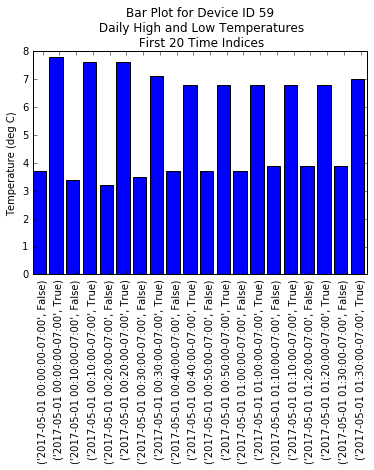

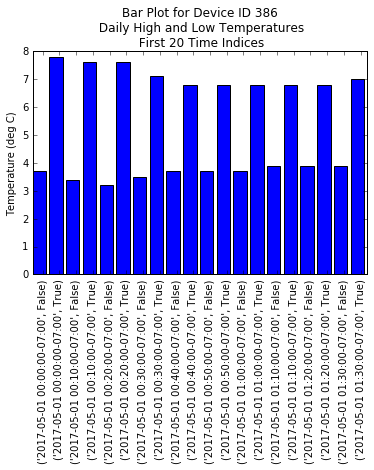

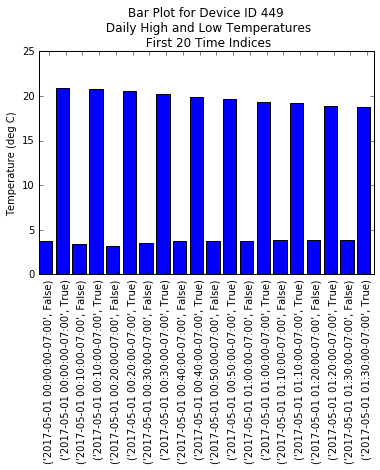

In [5]:
# Group time index with device ID's: [59, 386, 449] and aggregate with min and max temperatures
agg_temp_59 = temp_data.groupby(['index', temp_data.device_id == 59]).temperature.agg(['min', 'max'])
agg_temp_386 = temp_data.groupby(['index', temp_data.device_id == 386]).temperature.agg(['min', 'max'])
agg_temp_449 = temp_data.groupby(['index', temp_data.device_id == 449]).temperature.agg(['min', 'max'])

# Daily high and low temperature bar plot of the first 20 time indices for device ID 59
x_59 = np.arange(len(agg_temp_59.index[:20]))
y_59 = agg_temp_386.iloc[:20, 0:-1].values
plt.bar(x_59, y_59)
plt.title('Bar Plot for Device ID 59\n Daily High and Low Temperatures\n First 20 Time Indices')
plt.xticks(x_59 + 0.6, agg_temp_59.index[:20], rotation = 90)
plt.ylabel('Temperature (deg C)')
plt.show()

# Daily high and low temperature bar plot of the first 20 time indices for device ID 386
x_386 = np.arange(len(agg_temp_386.index[:20]))
y_386 = agg_temp_386.iloc[:20, 0:-1].values
plt.bar(x_386, y_386)
plt.title('Bar Plot for Device ID 386\n Daily High and Low Temperatures\n First 20 Time Indices')
plt.xticks(x_386 + 0.6, agg_temp_386.index[:20], rotation = 90)
plt.ylabel('Temperature (deg C)')
plt.show()

# Daily high and low temperature bar plot of the first 20 time indices for device ID 449
x_449 = np.arange(len(agg_temp_449.index[:20]))
y_449 = agg_temp_449.iloc[:20, 0:-1].values
plt.bar(x_449, y_449)
plt.title('Bar Plot for Device ID 449\n Daily High and Low Temperatures\n First 20 Time Indices')
plt.xticks(x_449 + 0.6, agg_temp_449.index[:20], rotation = 90)
plt.ylabel('Temperature (deg C)')
plt.show()

#### Q5: Using the data, what was the actual highest temperature in the month of May and where did it occur?

In [6]:
# Determine the latitude and longitude coordinates of the actual highest temperature for the month of May

# Declare temperature variable
temp = temp_data.iloc[:, 4:].values
lat_long = temp_data.latlng.values

# Replace missing temperature values with mean temperature
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(temp)
temp = imputer.transform(temp)

# If temperature values fall outside plus or minus 100 deg C, replace value with 'NaN' 
for n, i in enumerate(temp):
    if abs(i) > 100:
        temp[n] = 'NaN'

# Replace 'NaN' temperature values with mean temperature
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(temp)
temp = imputer.transform(temp)

# Map temperature values to an array of floating point numbers
temp_float = map(float, temp)

# Determine the index value for the highest temperature in May
temp_max_index = temp_float.index(np.max(temp_float))

# Convert latitude & longitude values into strings
string_lat_long = str(lat_long[temp_max_index])

# Parse string coordinate into separate latitude and longitude values
latitude, longitude = string_lat_long.strip().split('#')

# Determine the latitude and longitude coordinates of the highest temperature in May
print "The latitude and longitude coordinates for the highest temperature in May:"
print "%s deg C occurred at latitude %s and longitude %s, respectively" % (round(np.max(temp),6), round(float(latitude),6), 
                                                                           round(float(longitude),6))

The latitude and longitude coordinates for the highest temperature in May:
60.0 deg C occurred at latitude 39.466752 and longitude -122.149272, respectively


#### BONUS: What other insight can you gain from this data set? Pose and answer a question using this data set.

Exercise 1 - Average latitude and longitude by regular expression:
The average latitude is: 44.79005
The average longitude is: -121.921834

Exercise 2 - Filtered temperature output:
The filtered mean and standard deviation are 19.4676 and 8.227373, respectively.
The actual highest and lowest temperatures are 60.0 and -0.9 deg C, respectively.


C:\Users\Admin\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Exercise 3 - Train/Test Split Simple Linear Regression Model:


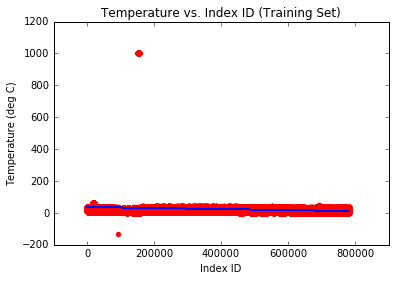

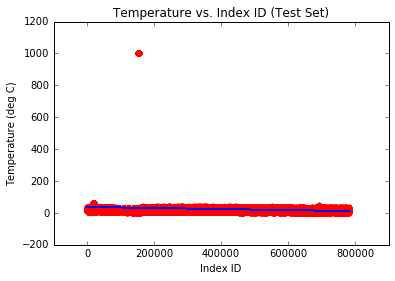

In [7]:
# Exercise 1:
# Apply regular expressions to separate latitude and longitude values and calculate their average

# Select attribute containing combined latitude & longitude values
lat_long = temp_data.latlng.values

# Convert latitude & longitude data into an array of strings
string_lat_long = str(lat_long)

# Apply a regular expression to extract string-numerical data
numeric_lat_long = re.findall("[-+]?[0-9]*\.?[0-9]+", string_lat_long)

# Place string-numerical data into an array
array_lat_long = np.array(numeric_lat_long)

# Convert string-numerical data into floating point elements
float_lat_long = array_lat_long.astype(np.float)

# Slice even- and odd-indexed elements into latitude and longitude arrays, respectively
latitude, longitude = float_lat_long[::2], float_lat_long[1::2]

# Print the average latitude and longitude, expressed to six decimal places
print "Exercise 1 - Average latitude and longitude by regular expression:"
print "The average latitude is:", round(np.mean(latitude),6)
print "The average longitude is:", round(np.mean(longitude),6)

# Exercise 2:
# Reject temperatures that fall outside the confidence interval of 1.96 standard deviations above or below the mean

# Define array of temperature values
temp = temp_data.iloc[:, 4:].values

# Replace missing values with mean temperature
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(temp)
temp = imputer.transform(temp)

# Map temperature values to an array of floating point numbers
temp_float = map(float, temp)

# Define confidence interval filter for floating point temperature values
mean = np.mean(temp_float, axis=0)
sd = np.std(temp_float, axis=0)
temp_filtered = [x for x in temp_float if (x > mean - 2 * sd)]
temp_filtered = [x for x in temp_filtered if (x < mean + 2 * sd)]

# Print the filtered temperature mean and standard deviation
print ""
print "Exercise 2 - Filtered temperature output:"
print "The filtered mean and standard deviation are %s and %s, respectively." % (round(np.mean(temp_filtered),6), 
                                                                                round(np.std(temp_filtered),6))

# Print the filtered (actual) max and min temperatures
print "The actual highest and lowest temperatures are %s and %s deg C, respectively." % (round(np.max(temp_filtered),6), 
                                                                                         round(np.min(temp_filtered),6))

# Exercise 3
# Apply Simple Linear Regression with Train/Test Split to the temperature data results from Question 5

# Declare index id as independent (x-axis) and temperature as dependent (y-axis) 
x = index_id
y = temp

# Split the x and y variables into both Training (0.7) and Test (0.3) Sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Fit the Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predict the Test Set results
y_pred = regressor.predict(x_test)

print ""
print "Exercise 3 - Train/Test Split Simple Linear Regression Model:"

# Plot the Training Set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Temperature vs. Index ID (Training Set)')
plt.xlabel('Index ID')
plt.ylabel('Temperature (deg C)')
plt.show()

# Plot the Test Set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Temperature vs. Index ID (Test Set)')
plt.xlabel('Index ID')
plt.ylabel('Temperature (deg C)')
plt.show()

# Additional insights and considerations:
# 1. Apply a Multivariate Gaussian Distribution to detect temperature outliers, as an alternative to the 
#    confidence interval approach in Exercise 2
# 2. Apply a Heat Map, in order to generate a color distribution of average temperature